# COGS 118B - Final Project

# Discovering Semantic Patterns In Word Difficulty Using Clustering

## Group members

- Anh Tran
- Eric Song
- Kendrick Nguyen

# Abstract 

This project seeks to find underlying patterns in English words that can contribute to its difficulty. We define word difficulty as the level of complexity in understanding a particular word. Although word difficulty is largely subjective and experience-dependent, we would like to examine whether certain semantic features in English words also carry independent and/or latent significance to difficulty. In fact, this project will build off from another study, the *Word Difficulty Prediction Using Covolutional Neural Networks study* (Basu, Garain, and Naskar, 2019)<a name="avishek"></a>[<sup>[1]</sup>](#avisheknote), that similarly aligns with our project.

Our project employs exploratory data analysis and machine learning algorithms to find critical semantic patterns contributing to word difficulty using the study's corpus dataset that also contains semantic features, such as `Length`, `Log_Freq_HAL`, and `I_Zscore`. In our case, we define `I_Zscore` as a metric of word difficulty (0 being easy to understand and 1 being hard to understand). This project attempts to find underlying patterns using various unsupervised learning clustering algorithms, yet our findings were unfortunately poor based on silhouette score metrics. However, since these silhouette score metrics were similarly and consistently low, we concluded that our project was limited by the relatively small corpus dataset and unaccounted external factors that could also contribute to word difficulty.

# Background

English is currently the most spoken language in the world at 1.456 billion speakers <a name="wiki"></a>[<sup>[2]</sup>](#wikinote). A large portion of these English speakers are those learning it as a second language <a name="wiki"></a>[<sup>[2]</sup>](#wikinote). Often times, people who are learning the language find it difficult and encounter many challenges such as the complexity of pronunciation and non-obvious rule sets (for instance, think of “read” and “read”<a name="adjective"></a>[<sup>[6]</sup>](#adjectivenote)). To gain a better understanding of how the language is learned by English second language learners, many delve into how difficult it is to learn a particular word of the English language. For example, the Flesch-Kincaid readability tests was created in order to see how difficult a passage in English is to grasp<a name="flesch"></a>[<sup>[3]</sup>](#fleschnote). The test was created based on the need to judge the U.S. Navy recruitment to see their reading comprehension level. The test uses total words, total sentences, total syllables, and total words to plug into an equation to churn out a score.

Another research group that looked to analyze English words was <a name="avishek"></a>[<sup>[1]</sup>](#avisheknote). Building on the English Lexicon Project, Basu et. al. looked to use traditional machine learning models as well as a convolutional neural network based prediction model to predict word difficulty. We will build on the foundations that this project and the English Lexicon Project laid out. In particular, we will be using their `I_Zscore` as a metric of word difficulty. The `I_Zscore` is the “standardized mean lexical decision latency for each word” <a name="lexicon"></a>[<sup>[7]</sup>](#lexiconnote)). The lexical decision latency is the time it takes to read a word and decide whether that word is in the English language or not <a name="lexical"></a>[<sup>[8]</sup>](#lexicalnote). Presumably, this is a way for us to decide how difficult a word is. Harder words may have higher lexical decision latency than easier words, as the English Lexicon Project goes to explore.

We will, in part, be using unsupervised machine learning techniques to try and discover underlying patterns between words that are classified as easy (closer to 0 on the `I_Zscore`) and words that are classified as hard (closer to 1 on the `I_Zscore`).

By discovering certain patterns among English words, such as similarities in its pronunciation or length, many English speakers and learners could leverage these patterns to learn new words that follow a similar convention. These patterns could alternatively provide English speakers and learners insights and expectations about word difficulty, which can facilitate people’s subjective opinions on how language is used and learned.

# Problem Statement

The scope of this project's problem statement is to determine what makes an English word difficult semantically and whether easy/difficult words share some underlying similarity that isn't immediately obvious using clustering. For difficult words, we define it as the `I_Zscore` obtained from the *Word Difficulty Prediction Using Covolutional Neural Networks* study<a name="avishek"></a>[<sup>[1]</sup>](#avisheknote). Our success can be measured in some of the following ways: finding clusters that correspond well with the `I_Zscore` and computing silhouette score to evaluate the clustering. To find underlying patterns, we will examine and compare the semantic features (ex. `Length`, `Log_Freq_HAL`, `I_Mean_Accuracy`, etc.) for each word within a cluster.

# Proposed Solution
These experimentations will be achieved by conducting:

* **Exploratory Data Analysis (EDA):** To summarize the main characteristics of the dataset by visualizing its default features. EDA for instance could help us understand the distribution of quantitative-typed features and, if applicable, identify redundant features to eliminate.
  * Using linear regression model and looking at $R^2$ to see if the model will changes in a significant way when we drop one particular feature. In addition, we will be using sklearn permutation importance to cross coorelate and see if it would give us similar result.
  * Dimension reduction & feature Selection are used to extract and reduce for the most important features in the dataset. This step works in conjunction with EDA as it provides insights for the most prevalent features or patterns in English words. This will mostly be accomplished using Principal Component Analysis (PCA) and various feature selection such as UMAP.
 
* **Various Clustering Algorithms:** Once we have seen how the dimensionality reduction would help us in lower dimension, we can try and cluster these density points. In addition, we wanted to try clustering methods on the data it self since there are not a lot of dimensions on the data to warrant the use to dimensionality reduction. These clustering methods that we will try will be:
  * K-Means clustering
  * Gaussian mixture model
  * Hierarchical clustering
  * Spectral clustering
  * Word embedding-based clustering
 

* **Data Augmentation:** To create additional dataset features, such as classifying its grammatical category, vowels, entropy, part of speech, n-grams, phonetics, word embeddings/token, sentiment scores, etc. This could be achieved by stitching an additional word/dictionary-based dataset or utilizing a public word/dictionary API to obtain these features. Obtaining more features could strengthen our analysis for word patterns and difficulty. In addition, we want to feature selecting the to make sure we reduce redundancy.

# Data

Our dataset of choice is a corpus dataset from the *Word Difficulty Prediction Using Covolutional Neural Networks study* (Basu, Garain, and Naskar, 2019)<a name="avishek"></a>[<sup>[1]</sup>](#avisheknote). The words were tokenized from the SUBTLEXUS corpus of 131 million words.

- The raw dataset is also published on from Kaggle: https://www.kaggle.com/datasets/kkhandekar/word-difficulty. 
- Number of observations: 9 variables, 40481 observations
- Description: An observation consists of the `Word`, `Length`, `Freq_HAL`, `Log_Freq_HAL`, `I_Mean_RT`, `I_Zscore`, `I_SD`, `Obs`, and `I_Mean_Accuracy`.
- Critical variables for our problem statement is `I_Zscore`, as it denotes the difficulty of a word. This value fluctuates between 0 and 1 for a word with 0 being SIMPLE and 1 being DIFFICULT.

In [1]:
#pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/WordDifficulty.csv')
df.head()

,Word,Length,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_SD,Obs,I_Mean_Accuracy
0,a,1,10610626,16.18,798.92,-0.01,333.85,24.0,0.73
1,aah,3,222,5.40,816.43,0.21,186.03,21.0,0.62
2,Aaron,5,10806,9.29,736.06,-0.11,289.01,32.0,0.97
3,aback,5,387,5.96,796.27,0.11,171.61,15.0,0.45
4,abacus,6,513,6.24,964.40,0.65,489.00,15.0,0.47


**The following is a brief description of each feature:**

- `Length`: Number of characters

- `Freq_HAL`: Hyperspace Analogue to Language frequency norms based on the HAL corpus of 131 million words. Higher values may indicate more frequent words in a corpus.

- `Log_Freq_HAL`: Applied logarithmic transformation to `Freq_HAL`

- `I_Mean_RT`: Individual mean reaction time, associated with lexical decision time

- `I_Zscore`: Z-score of individual reaction times, associated with word difficulty

- `I_SD`: Standard deviation of individual reaction times

- `Obs`: Number of observations/individuals experimented with respective word

- `I_Mean_Accuracy`: Individual mean accuracy score, average accuracy score in tasks related to word difficulty

This dataset appears somewhat preprocessed prior to publishment where some features have a transformed or standardized version of themselves. From glance, we can perform feature selection by removing the `Freq_HAL`, `I_Mean_RT`, `I_SD`, and `Obs` columns as the dataset already offers the same feature but transformed. The critical feature `I_Zscore` is a function of `I_Mean_RT` and `I_SD`, so including the the latter is redundant.

In [3]:
# Drop Freq_HAL and Obs columns
df = df.drop(['Freq_HAL', 'I_Mean_RT', 'I_SD', 'Obs'], axis=1)
df = df.dropna().reset_index(drop=True)

# Apply lower to words
df['Word'] = df['Word'].str.lower()

In [4]:
import re

# Use regex to remove any quotes, astericks, and other punctuations
pattern = r"[\"*!?.,']"

for index, word in enumerate(df['Word']):
    cleaned_word = re.sub(pattern, '', word)
    df.loc[index, 'Word'] = cleaned_word
    
# Remove duplicates
df.drop_duplicates('Word', inplace=True)

**This dataset can be strengthened by extracting more features, such as:**

- Vowel Count, also correlated to syllables
- Entropy, or the measure of the unpredictability of the word's character. Computed from $H(x)=\Sigma{p(x)\log{p(x)}}$
- Parts of speech category. Tagged based on the [Penn Treebank Project](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html).
- Sentiment score

In [5]:
# Count vowels
vowels = ['a', 'e', 'i', 'o', 'u']
num_vowels = []
for word in df['Word']:
    vowel_count = sum(word.count(vowel) for vowel in vowels)
    num_vowels.append(vowel_count)
    
df['Vowels'] = num_vowels

In [6]:
from collections import Counter
import math

# Word entropy
def calculate_entropy(word):
    # Frequency of each character
    char_counts = Counter(word)

    # Calculate the probability of each character
    total_chars = len(word)
    char_probabilities = {char: count / total_chars for char, count in char_counts.items()}

    # Calculate the entropy
    entropy = -sum(prob * math.log2(prob) for prob in char_probabilities.values())

    return entropy

entropy_values = [calculate_entropy(word) for word in df['Word']]
df['Entropy'] = entropy_values

In [7]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download(['vader_lexicon', 'averaged_perceptron_tagger'])

# Getting parts of speech
word_tags = nltk.pos_tag(df['Word'])
word_tags = [word_tag[1] for word_tag in word_tags]

df['PoS'] = word_tags

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\erics\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\erics\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [8]:
# Getting sentiment score, we look at the compound score for a final vote
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(word)['compound'] for word in df['Word']]

df['SentimentScore'] = sentiment_scores

In [9]:
# Save preprocessed dataset
df.to_csv('./data/NewWordDifficulty.csv', index=False)
df.set_index('Word', inplace=True)
df.head()

,Length,Log_Freq_HAL,I_Zscore,I_Mean_Accuracy,Vowels,Entropy,PoS,SentimentScore
Word,,,,,,,,
a,1,16.18,-0.01,0.73,1,-0.000000,DT,0.0
aah,3,5.40,0.21,0.62,2,0.918296,JJ,0.0
aaron,5,9.29,-0.11,0.97,3,1.921928,NN,0.0
aback,5,5.96,0.11,0.45,2,1.921928,NN,0.0
abacus,6,6.24,0.65,0.47,3,2.251629,NN,0.0


## Exploratory Data Analysis: Looking at each features and their correlation
Some basic EDA of each features in order to help us understand the overall data better.

In [10]:
import matplotlib.pyplot as plt

In [11]:
df.describe()

,Length,Log_Freq_HAL,I_Zscore,I_Mean_Accuracy,Vowels,Entropy,SentimentScore
count,39990.000000,39990.000000,39990.000000,39990.000000,39990.000000,39990.000000,39990.000000
mean,7.997424,6.175699,0.004519,0.841193,2.998125,2.609046,-0.004467
std,2.461114,2.397285,0.463040,0.199234,1.242677,0.408277,0.122506
min,1.000000,0.000000,-1.030000,0.030000,0.000000,-0.000000,-0.709600
25%,6.000000,4.700000,-0.340000,0.780000,2.000000,2.321928,0.000000
50%,8.000000,6.200000,-0.060000,0.940000,3.000000,2.646439,0.000000
75%,10.000000,7.750000,0.280000,0.970000,4.000000,2.921928,0.000000
max,21.000000,16.960000,2.510000,1.000000,10.000000,3.700440,0.659700


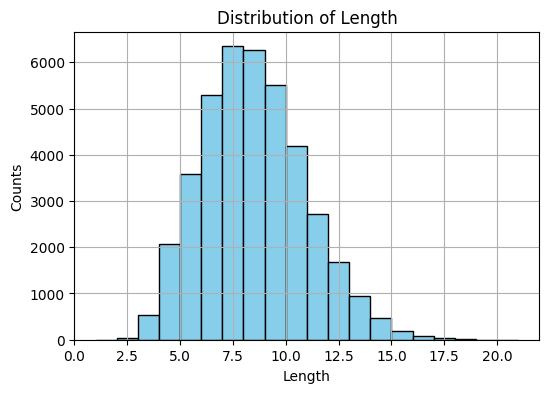

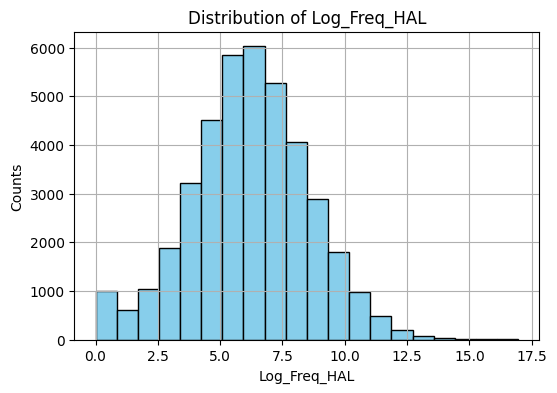

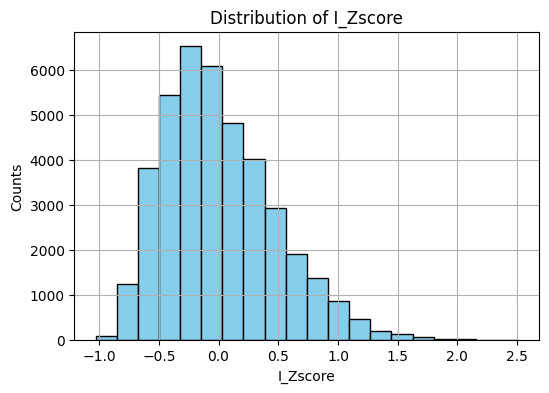

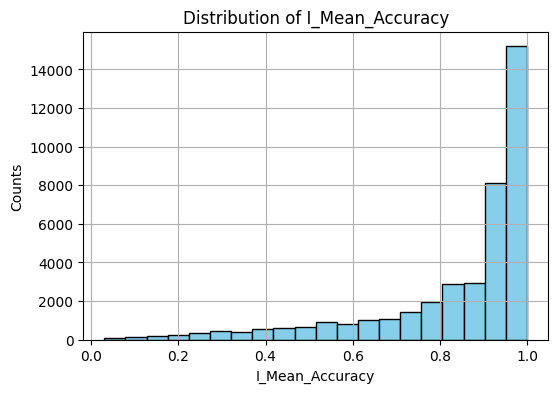

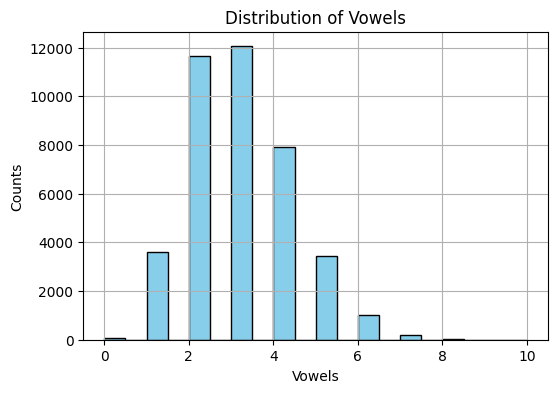

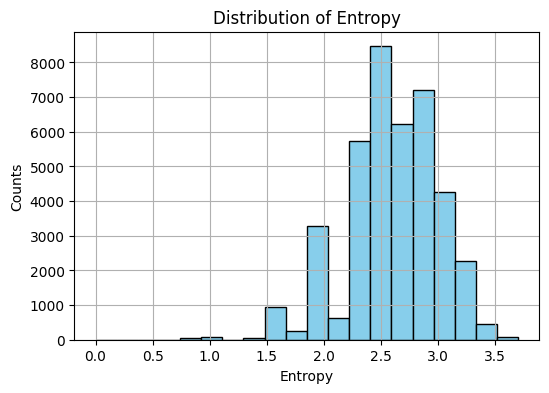

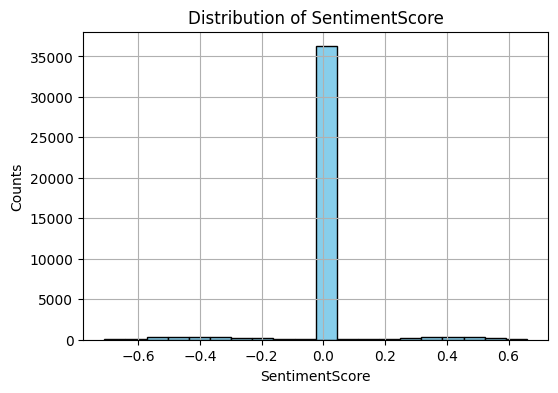

In [12]:
numeric_features = ['Length', 'Log_Freq_HAL', 'I_Zscore', 'I_Mean_Accuracy', 'Vowels', 'Entropy', 'SentimentScore']
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Counts')
    plt.grid(True)
    plt.show()

Overall, majority of the graphs follows the normal distribution patterns except for `SentimentalScore`, and `I_Mean_Accuracy`. `SentimentalScore` make sense because each words dont always have an inherent connotation associated to it. The meaning are derived from the whole sentence which can give the word more or less emotional attachment to it. For `I_Mean_Accuracy`, we can see that the more difficult the words, the less of `I_Mean_Accuracy` it will get. Which suggests that a huge chunk of the words are easy to medium difficulty while only a few are difficult.

In [13]:
pos_counts = df['PoS'].value_counts()
pos_counts

PoS
NN      12538
JJ       8307
NNS      6269
VBP      3159
VBG      2549
VBD      2384
RB       1918
VBN      1120
VBZ       593
VB        278
IN        249
JJR       199
JJS       132
RBR        72
FW         44
DT         26
PRP        23
CD         21
RP         20
CC         18
MD         17
WRB        13
NNP        11
WP          8
PRP$        8
WDT         6
RBS         5
POS         1
TO          1
WP$         1
Name: count, dtype: int64

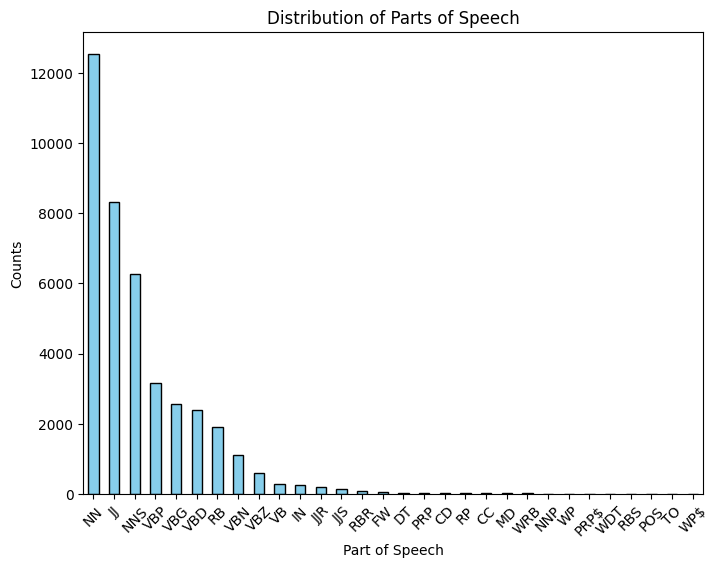

In [14]:
plt.figure(figsize=(8, 6))
pos_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Parts of Speech')
plt.xlabel('Part of Speech')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

A huge chunk of words are in NN, JJ, NNS, VBP, VBG, RB, VBN, and VBZ in part of speech categories

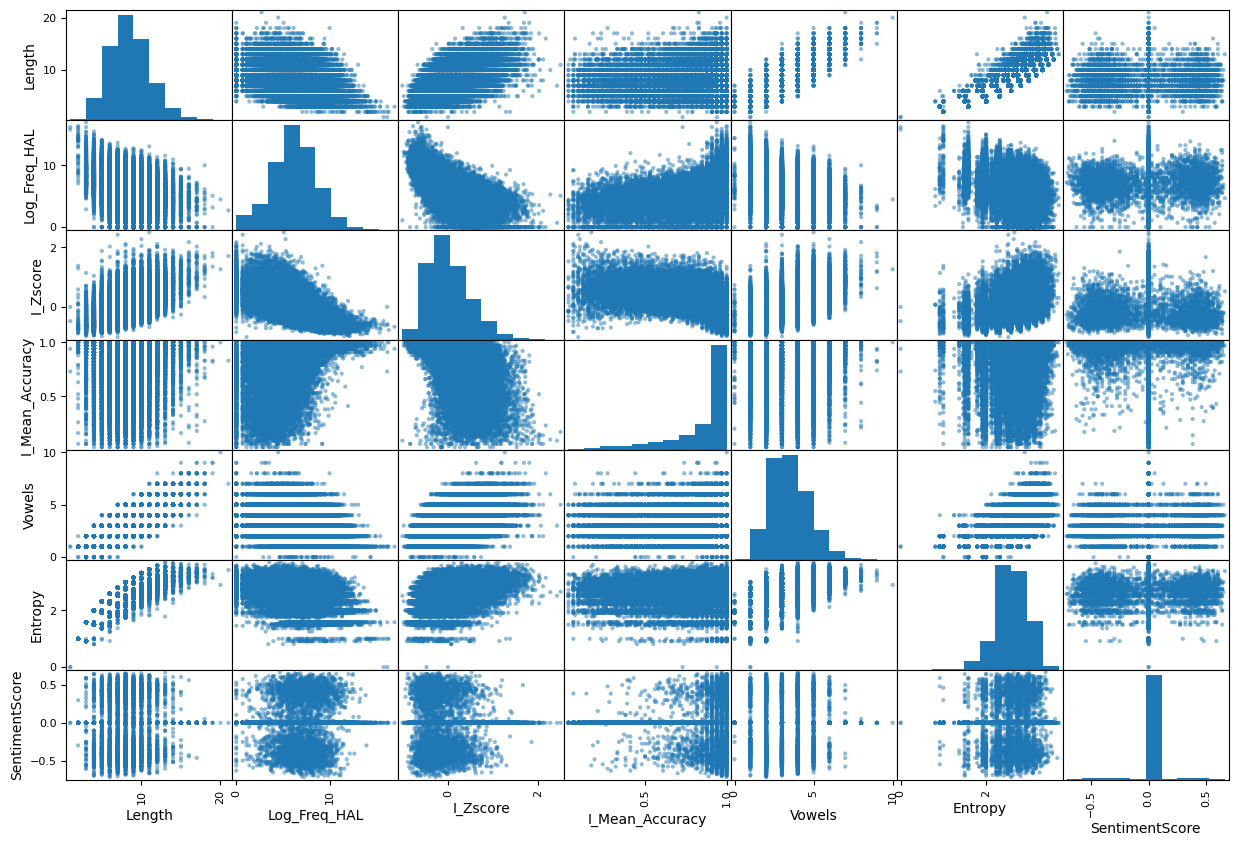

In [15]:
pd.plotting.scatter_matrix(df, figsize = (15,10));

An overall look at how much features are interacting with one another. A couple of things make sense as `Length`, `Entropy`, and `Vows` sort of having the effects with the longer the words, the more likely it is going to have more `Entropy` associated with it. Same thing with Length and `Vows`, the longer the words, the more likely it is going to have more `Vows`. `SentimentalScore` with most of of the words being zero, making most of the graph split in two.

# Evaluation Metrics

The goal of this project is not predicting word difficulty but rather clustering words based on semantic features and exploring any underlying relationships based on the `I_ZScore` feature. The metric used to evaluate the performance of our clustering algorithms is a Silhouette Scores, which quantifies the density and separation of clusters. This metric is bounded by the range from -1 to 1, and ideally a higher positive score is desired.

Meanwhile, "0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar."<a name="sklearn"></a>[<sup>[4]</sup>](#sklearnnote).

Silhouette Scores can be mathematically represented where,<a name="fleischer"></a>[<sup>[5]</sup>](#fleischernote)

$a$: The mean distance between a sample and all other points in the same class

$b$: The mean distance between a sample and all other points in the next nearest cluster

$$score = \frac{b-a}{max(a,b)}$$

For the exploratory data analysis aspect, we would like to visualize how certain features relate with difficulty; thus, visual inspection of 2D plots will be another form evaluation. Regression algorithms will also be used to find correlations among all features against `I_ZScore` in a One Vs. One manner. Therefore, to find correlation strengths between patterns and `I_ZScore`s, we use $R^2$ proportion of variance explained by the model to evaluate performance. This value ranges from 0 to 1, and a higher value is desired for a better fit. Briefly, this is mathematically represented as

$$R^2 = 1 - \frac{\Sigma(y-\hat{y})^2}{\Sigma(y-\bar{y})^2}$$

# Results

## Part I: Exploratory Data Analysis Using Regression

We will be using linear regression to obtain the $R^2$ proportion of variance in One Vs. One manner. Specifically, we will regress all features against the `I_ZScore` and drop one feature at a time to see the affects of $R^2$. Drastic changes from removing a specific feature, say by 10% based on the 10% Rule for Confounding, will be regarded as a critical feature for word difficulty.

In [16]:
import seaborn as sns

In [17]:
df = df.drop('PoS', axis=1)

In [18]:
from sklearn.linear_model import LinearRegression

# Linear regression
regression_df = df.drop('I_Zscore', axis=1)

regression = LinearRegression()
regression.fit(regression_df, df['I_Zscore'])

benchmark_r = regression.score(regression_df, df['I_Zscore'])
print(f"Benchmark R^2 value: {benchmark_r}")

Benchmark R^2 value: 0.726056832508917


In [19]:
# Print magnitude correlation coefficients
for feature, coef in zip(regression_df.columns, regression.coef_):
    print(f'{feature}: {abs(coef)}')

Length: 0.08682825420697239
Log_Freq_HAL: 0.05204616302389812
I_Mean_Accuracy: 1.0840808162625655
Vowels: 0.04239914287564885
Entropy: 0.12633635262560425
SentimentScore: 0.04606578369071135


In [20]:
# Find critical features
for dropped_feature in regression_df.columns:
    temp_df = regression_df.drop(dropped_feature, axis=1)
    
    conf_regression = LinearRegression()
    conf_regression.fit(temp_df, df['I_Zscore'])
    new_r = conf_regression.score(temp_df, df['I_Zscore'])
    
    if not(benchmark_r * 0.9 < new_r < benchmark_r * 1.1):
        print(dropped_feature)

I_Mean_Accuracy


It appears that `I_Mean_Accuracy` is a critical feature correlated to word difficulty or `I_ZScore`. This is expected because its correlation coefficient is relatively larger compared to the others. Alternatively, we can prove this with `sklearn`'s methods for feature selection/permutation,

In [21]:
# Permutation importance with sklearn
from sklearn.inspection import permutation_importance

permutation_scores = permutation_importance(regression, regression_df, df['I_Zscore'], n_repeats=10)
importance_scores = permutation_scores.importances_mean

# Print feature importance scores
for feature, score in zip(regression_df.columns, importance_scores):
    print(f'{feature}: {abs(score)}')

Length: 0.42518619960588433
Log_Freq_HAL: 0.14431355421714043
I_Mean_Accuracy: 0.434281161208934
Vowels: 0.025769036647297693
Entropy: 0.025088164447549022
SentimentScore: 0.0003303331959359057


With this method `I_mean_Accuracy` is barely higher `Length` as a critical feature.

## Part II: Exploratory Data Analysis Using Dimensionality Reduction

Since there are multiple components of this dataset, we wanted to see when we reduce it down to see if there are any visible density that we can see from couple of the dimensionality reduction techniques.

In [22]:
from sklearn.preprocessing import StandardScaler

# Standardize df
scale = StandardScaler()
scaled_data = scale.fit_transform(df)

scaled_df = pd.DataFrame(data=scaled_data, columns=df.columns)
scaled_df.head()

,Length,Log_Freq_HAL,I_Zscore,I_Mean_Accuracy,Vowels,Entropy,SentimentScore
0,-2.843229,4.173232,-0.031356,-0.558108,-1.607940,-6.390463,0.036461
1,-2.030579,-0.323578,0.443770,-1.110229,-0.803215,-4.141236,0.036461
2,-1.217929,1.299111,-0.247323,0.646520,0.001509,-1.682991,0.036461
3,-1.217929,-0.089977,0.227804,-1.963508,-0.803215,-1.682991,0.036461
4,-0.811604,0.026823,1.394024,-1.863122,0.001509,-0.875438,0.036461


### PCA

First we wanted to see if PCA the original dataset without the feature engineering components to see how it would turn out.

In [23]:
# read in pre-feature engineer df
df_old = pd.read_csv('data/WordDifficulty.csv')
df_old.head()

,Word,Length,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_SD,Obs,I_Mean_Accuracy
0,a,1,10610626,16.18,798.92,-0.01,333.85,24.0,0.73
1,aah,3,222,5.40,816.43,0.21,186.03,21.0,0.62
2,Aaron,5,10806,9.29,736.06,-0.11,289.01,32.0,0.97
3,aback,5,387,5.96,796.27,0.11,171.61,15.0,0.45
4,abacus,6,513,6.24,964.40,0.65,489.00,15.0,0.47


In [24]:
# clean and drop missing data
df_old = df_old.dropna(axis = 0).reset_index(drop=True) # missing data has no value to us

In [25]:
# remove the Word column
df_old = df_old[df_old.columns[1:]]
df_old.head()

,Length,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_SD,Obs,I_Mean_Accuracy
0,1,10610626,16.18,798.92,-0.01,333.85,24.0,0.73
1,3,222,5.40,816.43,0.21,186.03,21.0,0.62
2,5,10806,9.29,736.06,-0.11,289.01,32.0,0.97
3,5,387,5.96,796.27,0.11,171.61,15.0,0.45
4,6,513,6.24,964.40,0.65,489.00,15.0,0.47


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_scaled = StandardScaler().fit_transform(df_old)
init_pca = PCA(n_components = 8) # 8 features in our initial dataframe
df_init_pca = init_pca.fit(df_scaled)
# run this to see what the attributes of the pca are
# df_init_pca.__dict__

In [27]:
sum(df_init_pca.explained_variance_ratio_)

1.0000000000000002

We can run PCA and then we can check how much of the variance in the data is explained. As expected, this value is very close to 1. Now, let's try and measure the explained various amongst different numbers of components to see if we can filter out some of the noise in our dimensionality reduction.

In [28]:
n = []
var_exp = []

for i in range(1, 9): # going up to 8 components
    curr = PCA(n_components = i)
    n.append(i)
    var_exp.append(sum(curr.fit(df_scaled).explained_variance_ratio_))
n

[1, 2, 3, 4, 5, 6, 7, 8]

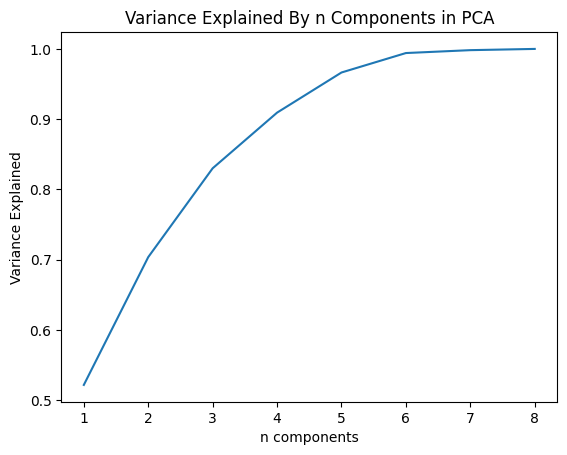

In [29]:
# Looking for elbow
sns.lineplot(x = n, y = var_exp)
plt.title("Variance Explained By n Components in PCA")
plt.xlabel("n components")
plt.ylabel("Variance Explained")
plt.show()

There is a drastic decrease in improvement in variance at 6 components. We will go with this number of components.

In [30]:
pca_6 = pd.DataFrame(PCA(n_components=6).fit_transform(df_scaled), columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])
pca_6.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,-4.606649,7.391951,53.929048,7.471410,4.988962,0.233160
1,0.403115,2.444655,-0.293659,-0.005743,0.392012,-1.158317
2,-1.474571,0.138848,0.189641,-1.190320,-0.145866,-0.680153
3,0.941364,2.954207,-0.300353,0.398729,-0.523707,-0.303947
4,3.187210,1.319740,0.461743,-2.103508,-0.235610,0.006953


In [31]:
assert pca_6.shape[0] == df_scaled.shape[0]
df_old.head()

,Length,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_SD,Obs,I_Mean_Accuracy
0,1,10610626,16.18,798.92,-0.01,333.85,24.0,0.73
1,3,222,5.40,816.43,0.21,186.03,21.0,0.62
2,5,10806,9.29,736.06,-0.11,289.01,32.0,0.97
3,5,387,5.96,796.27,0.11,171.61,15.0,0.45
4,6,513,6.24,964.40,0.65,489.00,15.0,0.47


Let's take a look at the `I_Zscore` to see where everything is distributed.

In [32]:
pd.DataFrame(df_scaled[:, 4]).describe()

,0
count,4.044900e+04
mean,-3.372746e-17
std,1.000012e+00
min,-2.232786e+00
25%,-7.612440e-01
50%,-1.553150e-01
75%,6.020962e-01
max,5.427888e+00


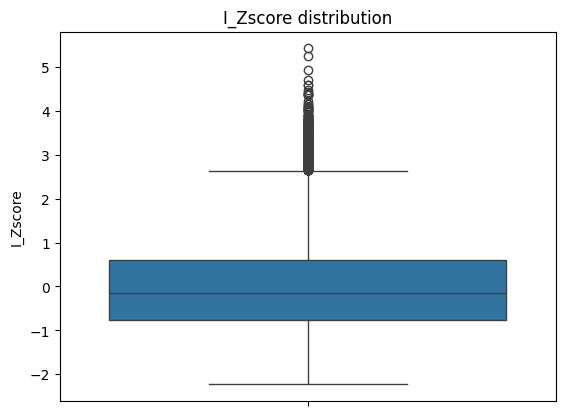

In [33]:
# Figure out the threshholds of where easy, medium, and hard line would be
sns.boxplot(df_scaled[:, 4])
plt.title("I_Zscore distribution")
plt.ylabel("I_Zscore")
plt.show()

Based on the results from above, we are semi-arbitrarily deciding some categories. This is for visualization purposes and for making our PCA plots somewhat more friendly to interpret; the true PCA/clustering doesn't really change. 

In [34]:
# Listing words into easy, medium, and hard
lst_categories = []

for score in df_scaled[:, 4].T:
    if score <= 0: # easy word?
        lst_categories.append("easy")
    elif score <= 2: # medium word?
        lst_categories.append("medium")
    else:
        lst_categories.append("hard")
print(df_scaled[:, 4].T.shape)

(40449,)


In [35]:
assert len(lst_categories) == df_scaled.shape[0]
pca_6['group'] = lst_categories
pca_6.head()

,pc1,pc2,pc3,pc4,pc5,pc6,group
0,-4.606649,7.391951,53.929048,7.471410,4.988962,0.233160,easy
1,0.403115,2.444655,-0.293659,-0.005743,0.392012,-1.158317,medium
2,-1.474571,0.138848,0.189641,-1.190320,-0.145866,-0.680153,easy
3,0.941364,2.954207,-0.300353,0.398729,-0.523707,-0.303947,medium
4,3.187210,1.319740,0.461743,-2.103508,-0.235610,0.006953,medium


Let's look at the distribution of our arbitrarily chosen words. It seems fair that there would be more easy words than hard words. 

In [36]:
pca_6['group'].value_counts()

group
easy      22621
medium    16162
hard       1666
Name: count, dtype: int64

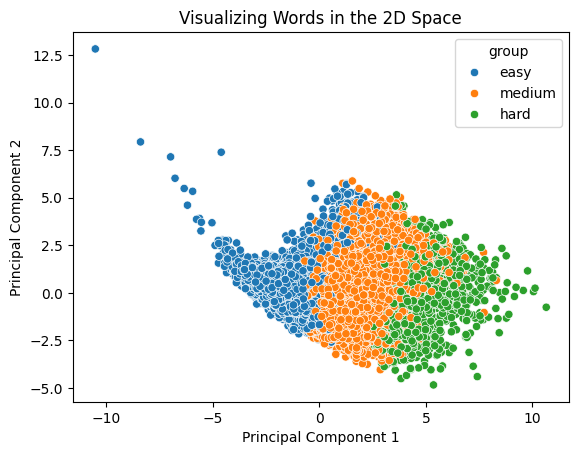

In [37]:
sns.scatterplot(x = 'pc1', y = 'pc2', hue='group', data=pca_6)
plt.title("Visualizing Words in the 2D Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

The plot above is the PCA result in a 2D space. Just from looking at it, it seems that there is *somewhat* of a separation/distinction between easy, medium, and hard words. The medium words seem to be in between the easy and hard words in the 2D space. Let's see how separated the easy and hard words are. 

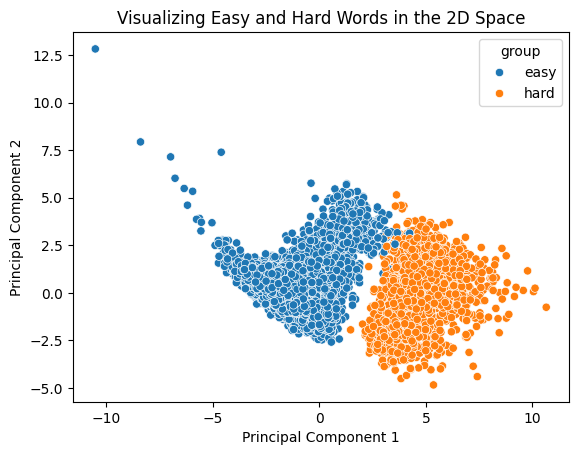

In [38]:
sns.scatterplot(x = 'pc1', 
                y = 'pc2', 
                hue='group', 
                data=pca_6[pca_6['group'].eq('easy') | pca_6['group'].eq('hard')])
plt.title("Visualizing Easy and Hard Words in the 2D Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

It looked like it clustered pretty well with easy and hard words relatively separated. However, the medium words are overlapping the easy and difficult words. We will need to look at the feature engineering data in order to see if it would replicate similar results.

### PCA with new Data

The following few cell blocks up to the two PCA graphs are about the same as the previous section. We are going through the same process, but with the feature engineered data included. This would be dimensions such as `Vowels`, `Entropy`, `Pos` (parts of speech), and `SentimentScore`. 

In [39]:
updated_df = pd.read_csv('data/NewWordDifficulty.csv')

In [40]:
updated_df.head()

,Word,Length,Log_Freq_HAL,I_Zscore,I_Mean_Accuracy,Vowels,Entropy,PoS,SentimentScore
0,a,1,16.18,-0.01,0.73,1,-0.000000,DT,0.0
1,aah,3,5.40,0.21,0.62,2,0.918296,JJ,0.0
2,aaron,5,9.29,-0.11,0.97,3,1.921928,NN,0.0
3,aback,5,5.96,0.11,0.45,2,1.921928,NN,0.0
4,abacus,6,6.24,0.65,0.47,3,2.251629,NN,0.0


In [41]:
updated_df_no_pos = updated_df[['Length', 'Log_Freq_HAL', 'I_Zscore',
       'I_Mean_Accuracy', 'Vowels', 'Entropy', 'SentimentScore']]
updated_df_no_pos.head()

,Length,Log_Freq_HAL,I_Zscore,I_Mean_Accuracy,Vowels,Entropy,SentimentScore
0,1,16.18,-0.01,0.73,1,-0.000000,0.0
1,3,5.40,0.21,0.62,2,0.918296,0.0
2,5,9.29,-0.11,0.97,3,1.921928,0.0
3,5,5.96,0.11,0.45,2,1.921928,0.0
4,6,6.24,0.65,0.47,3,2.251629,0.0


In [42]:
sud = StandardScaler().fit_transform(updated_df_no_pos)
sud.shape

(39990, 7)

In [43]:
number_components = []
variance_explained = []

for i in range(1, 8):
    curr = PCA(n_components = i)
    number_components.append(i)
    variance_explained.append(sum(curr.fit(sud).explained_variance_ratio_))

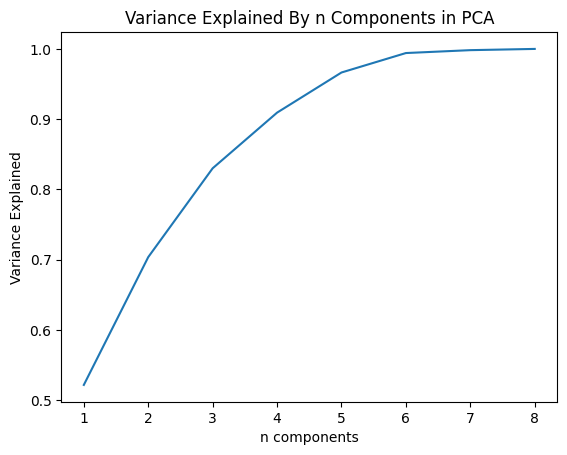

In [44]:
sns.lineplot(x = n, y = var_exp)
plt.title("Variance Explained By n Components in PCA")
plt.xlabel("n components")
plt.ylabel("Variance Explained")
plt.show()

Same thing as above, 6 components seem like where the improvement even out.

In [45]:
new_pca_6 = pd.DataFrame(
    PCA(n_components=6).fit_transform(df_scaled), columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6']
)
new_pca_6.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,-4.606649,7.391951,53.929048,7.471410,4.988962,0.233160
1,0.403115,2.444655,-0.293659,-0.005743,0.392012,-1.158317
2,-1.474571,0.138848,0.189641,-1.190320,-0.145866,-0.680153
3,0.941364,2.954207,-0.300353,0.398729,-0.523707,-0.303947
4,3.187210,1.319740,0.461743,-2.103508,-0.235610,0.006953


In [46]:
new_pca_6['group'] = pca_6['group'] # borrowing the labels from pca_6
new_pca_6.head()

,pc1,pc2,pc3,pc4,pc5,pc6,group
0,-4.606649,7.391951,53.929048,7.471410,4.988962,0.233160,easy
1,0.403115,2.444655,-0.293659,-0.005743,0.392012,-1.158317,medium
2,-1.474571,0.138848,0.189641,-1.190320,-0.145866,-0.680153,easy
3,0.941364,2.954207,-0.300353,0.398729,-0.523707,-0.303947,medium
4,3.187210,1.319740,0.461743,-2.103508,-0.235610,0.006953,medium


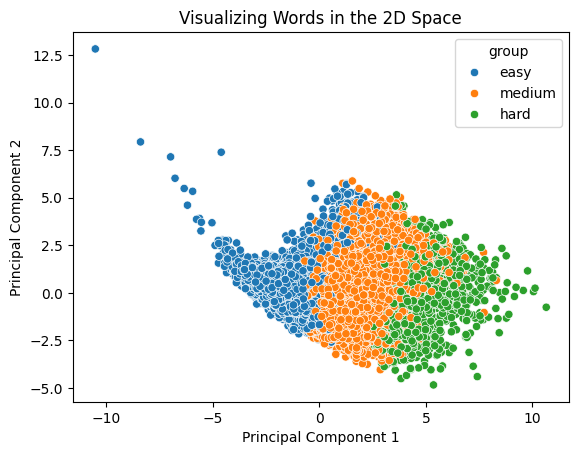

In [47]:
sns.scatterplot(x = 'pc1', y = 'pc2', hue='group', data=new_pca_6)
plt.title("Visualizing Words in the 2D Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

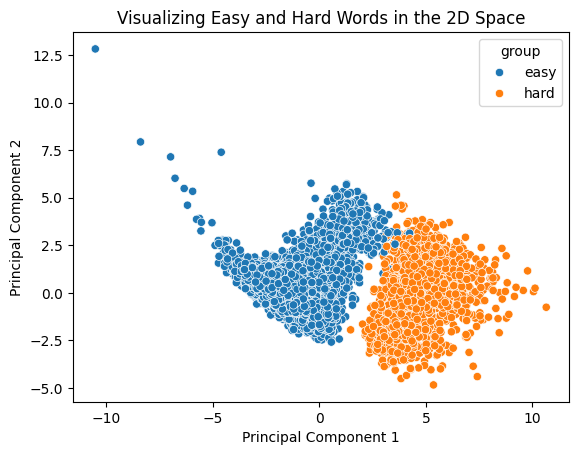

In [48]:
sns.scatterplot(x = 'pc1', 
                y = 'pc2', 
                hue='group', 
                data=new_pca_6[new_pca_6['group'].eq('easy') | new_pca_6['group'].eq('hard')])
plt.title("Visualizing Easy and Hard Words in the 2D Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Similar results as above, with easy and hard relatively separated with minor overlaping. We will try K-means on the results and Rand Index to see how the what the results would be like.

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import rand_score, adjusted_rand_score

In [50]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", n_init = 4).fit(new_pca_6[new_pca_6.columns[0:6]].to_numpy())
kmeans_df = new_pca_6.copy(deep=True)
kmeans_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,group
0,-4.606649,7.391951,53.929048,7.471410,4.988962,0.233160,easy
1,0.403115,2.444655,-0.293659,-0.005743,0.392012,-1.158317,medium
2,-1.474571,0.138848,0.189641,-1.190320,-0.145866,-0.680153,easy
3,0.941364,2.954207,-0.300353,0.398729,-0.523707,-0.303947,medium
4,3.187210,1.319740,0.461743,-2.103508,-0.235610,0.006953,medium


Once again, the labels are so that we can use ARI as a metric for judging how well things are clustered. It would not be appropriate to use ARI if we do not have these pre-defined labels. 

In [51]:
def convert_labels(label):
    if label == "easy":
        return 0
    if label == "medium":
        return 1
    if label == "hard":
        return 2
    return -1 # edge case

In [52]:
kmeans_df['group'] = kmeans_df['group'].apply(convert_labels)
kmeans_df['group'].value_counts() # shouldn't have any -1s!

group
0    22621
1    16162
2     1666
Name: count, dtype: int64

In [53]:
kmeans_df['predicted'] = kmeans.labels_
kmeans_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,group,predicted
0,-4.606649,7.391951,53.929048,7.471410,4.988962,0.233160,0,1
1,0.403115,2.444655,-0.293659,-0.005743,0.392012,-1.158317,1,2
2,-1.474571,0.138848,0.189641,-1.190320,-0.145866,-0.680153,0,1
3,0.941364,2.954207,-0.300353,0.398729,-0.523707,-0.303947,1,2
4,3.187210,1.319740,0.461743,-2.103508,-0.235610,0.006953,1,2


In [54]:
kmeans_adjusted_rand = adjusted_rand_score(kmeans_df['group'], kmeans_df['predicted'])
print("Adjusted Rand Index: ", kmeans_adjusted_rand)

Adjusted Rand Index:  0.4781233428877936


The ARI score is not very good. A value close to 0 suggests randomness and a value closer to 1 suggests perfect clusterings. Let's try this again, but this time with only the easy and the hard words. 

In [55]:
easy_hard = new_pca_6.copy(deep=True)
easy_hard = easy_hard[~easy_hard['group'].eq("medium")]
easy_hard['group'] = easy_hard['group'].apply(convert_labels)
easy_hard['group'].value_counts()

group
0    22621
2     1666
Name: count, dtype: int64

In [56]:
eh_kmeans = KMeans(n_clusters = 2, init = "k-means++", n_init = 4).fit(easy_hard[easy_hard.columns[0:6]].to_numpy())
easy_hard['predicted'] = eh_kmeans.labels_
easy_hard.head()

,pc1,pc2,pc3,pc4,pc5,pc6,group,predicted
0,-4.606649,7.391951,53.929048,7.471410,4.988962,0.233160,0,0
2,-1.474571,0.138848,0.189641,-1.190320,-0.145866,-0.680153,0,0
5,-1.690393,-0.026318,-0.075366,-0.084225,-0.248920,-0.172847,0,0
6,0.201236,-1.252052,0.501172,-1.720909,-0.392098,0.430758,0,0
7,-0.709976,-1.214797,0.018666,0.129504,-0.198927,0.304855,0,0


In [57]:
easy_hard_ari = adjusted_rand_score(easy_hard['group'], easy_hard['predicted'])
print("Adjusted Rand Index: ", easy_hard_ari)

Adjusted Rand Index:  0.9633587020649037


This is a better results which make sense because medium is merged into easy and hard words are pretty separated. Although we are limited in what we can interpret from the adjusted Rand indices, we can see that our *observation* that easy and hard words are fairly separated in a lower dimensional space is supported. 

### UMAP

Let's try and visualize the data with UMAP. Hopefully some more patterns are revealed to us.

In [58]:
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap

In [59]:
umap_df = pd.read_csv('data/NewWordDifficulty.csv')
umap_df.dropna(axis = 0, inplace=True)
umap_df = umap_df[['Word', 'Length', 'Log_Freq_HAL', 'I_Zscore',
       'I_Mean_Accuracy', 'Vowels', 'Entropy', 'SentimentScore']]

In [60]:
umap_df.head() # new copy of the dataframe

,Word,Length,Log_Freq_HAL,I_Zscore,I_Mean_Accuracy,Vowels,Entropy,SentimentScore
0,a,1,16.18,-0.01,0.73,1,-0.000000,0.0
1,aah,3,5.40,0.21,0.62,2,0.918296,0.0
2,aaron,5,9.29,-0.11,0.97,3,1.921928,0.0
3,aback,5,5.96,0.11,0.45,2,1.921928,0.0
4,abacus,6,6.24,0.65,0.47,3,2.251629,0.0


Let's normalize the data before we run UMAP.

In [61]:
umap_data = StandardScaler().fit_transform(umap_df[umap_df.columns[1:]])
umap_data.shape # getting the data

(39990, 7)

In [62]:
reduced_data = pd.DataFrame(
    umap.UMAP(
        min_dist = 0.1,
        n_neighbors = 20
    ).fit_transform(umap_data)
)

In [63]:
reduced_data['group'] = pca_6['group'] # borrowing the labels from the pca
reduced_data.head()

,0,1,group
0,7.950235,-1.409495,easy
1,7.896452,-2.061117,medium
2,5.780407,-0.749522,easy
3,9.744962,-1.440759,medium
4,1.334372,6.048789,medium


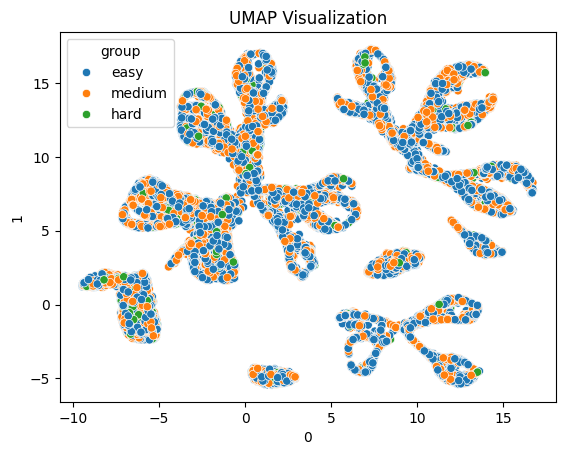

In [64]:
sns.scatterplot(x = reduced_data.columns[0], 
                y = reduced_data.columns[1], 
                hue=reduced_data.columns[2], 
                data = reduced_data)# [reduced_data['group'].eq('easy') | reduced_data['group'].eq('hard')])
plt.title("UMAP Visualization")
plt.show()

UMAP doesn't seem to work particularly well with cluster formed because it doesn't separate easy, medium, and hard words very well. This might be due to the fact that there are not that many components in order to ultilize the UMAP functionality well.

## Part III: K-Means Clustering

This will be the first clustering algorithm employed. The goal is to experiment whether K-Means clustering is an appropriate algorithm to cluster for words and to find any underlying relationships within a cluster if possible. We will not be using a reduced dataset from the previous Dimensionality Reduction section, as predicting with ~7 columns is more than sufficient.

Based on the previous plots, the dataset appears extremely dense, even when visualized in 2D. Therefore, will be using model selection off the bat to find the optimal `n_clusters` parameter.

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = [2, 3, 6, 9, 12, 15, 18, 21, 24]

silhouette_scores = []
inertia = []
for n in n_clusters:
    knn = KMeans(n_clusters=n)
    labels = knn.fit_predict(df)
    
    inertia.append(knn.inertia_)
    silhouette_scores.append(silhouette_score(df, labels))

C:\Users\erics\anaconda3\envs\COGS118B_WI24\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\erics\anaconda3\envs\COGS118B_WI24\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\erics\anaconda3\envs\COGS118B_WI24\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\erics\anaconda3\envs\COGS118B_WI24\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

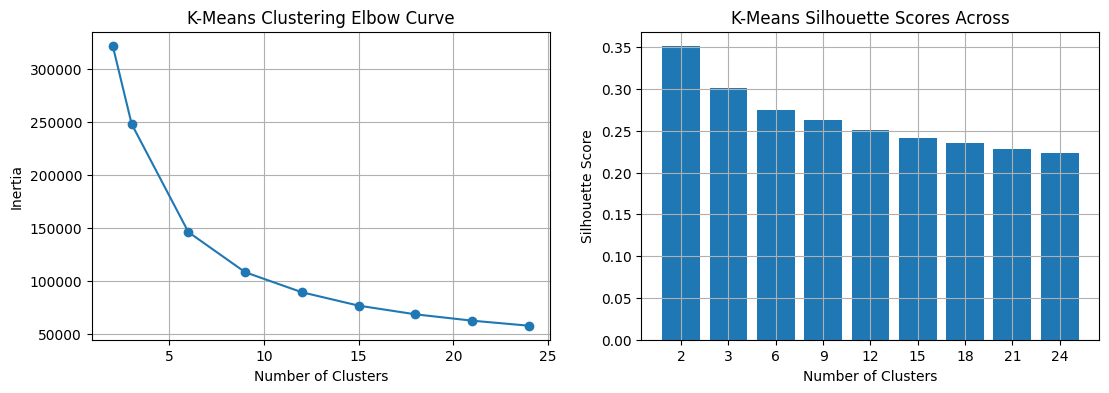

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

axes[0].plot(n_clusters, inertia, marker='o')
axes[0].set_title('K-Means Clustering Elbow Curve')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

cluster_str = [str(n) for n in n_clusters]
axes[1].bar(cluster_str, silhouette_scores)
axes[1].set_title('K-Means Silhouette Scores Across')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

plt.show()

From our quick model selection and elbow curve, we will approximate to 6 clusters or at the inflection point of the elbow curve. However, we will also consider 2 clusters as a candidate since it yieleded the highest silhouette score.

In [67]:
# For 2 clusters
knn = KMeans(n_clusters=2)
knn_labels_2_clusters = knn.fit_predict(df)

# For 6 clusters
knn = KMeans(n_clusters=6)
knn_labels_6_clusters = knn.fit_predict(df)

C:\Users\erics\anaconda3\envs\COGS118B_WI24\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\erics\anaconda3\envs\COGS118B_WI24\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


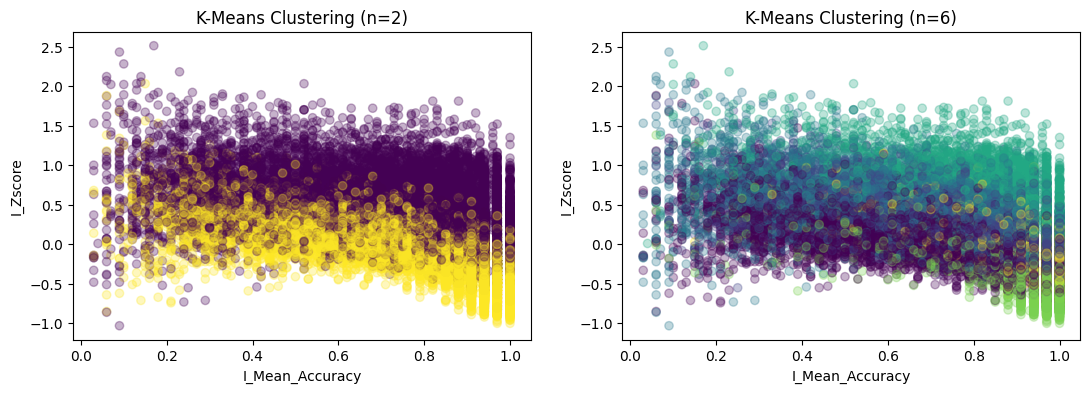

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

axes[0].scatter(df['I_Mean_Accuracy'], df['I_Zscore'], cmap='viridis', c=knn_labels_2_clusters, alpha=0.3)
axes[0].set_title('K-Means Clustering (n=2)')
axes[0].set_xlabel('I_Mean_Accuracy')
axes[0].set_ylabel('I_Zscore')

axes[1].scatter(df['I_Mean_Accuracy'], df['I_Zscore'], cmap='viridis', c=knn_labels_6_clusters, alpha=0.3)
axes[1].set_title('K-Means Clustering (n=6)')
axes[1].set_xlabel('I_Mean_Accuracy')
axes[1].set_ylabel('I_Zscore')

plt.show()

The plot above represents the K-Means clustering for 2 and 6 clusters respectively. They are visualized in 2D using the `I_Mean_Accuracy` and `I_Zscore` as they the critical features for this dataset. Based on these scatterplots, K-Means may not be the most appropriate model for clustering this dataset. If we observe K-Means with 2 clusters, which appears as the most "separable", the distribution of each cluster appears like a tied gaussian.

If we also search for underlying pattern among features, the aggregated mean standard deviation of each feature within a cluster have an overlapping ballpark. 

In [69]:
def std(x): return np.std(x)

kmeans_df = df
kmeans_df['Labels'] = knn_labels_2_clusters
kmeans_grouped = kmeans_df.groupby('Labels').agg(['mean', std])

kmeans_grouped

Length           Log_Freq_HAL            I_Zscore            \
            mean       std         mean       std      mean       std   
Labels                                                                  
0       9.884965  1.876173     4.766688  2.065915  0.285711  0.429781   
1       6.298746  1.499390     7.443729  1.919147 -0.248538  0.325460   

       I_Mean_Accuracy              Vowels             Entropy            \
                  mean       std      mean       std      mean       std   
Labels                                                                     
0             0.803654  0.215263  3.818393  1.100467  2.859012  0.282806   
1             0.874975  0.176929  2.259930  0.832827  2.384091  0.371323   

       SentimentScore            
                 mean       std  
Labels                           
0           -0.003503  0.112190  
1           -0.005334  0.131089

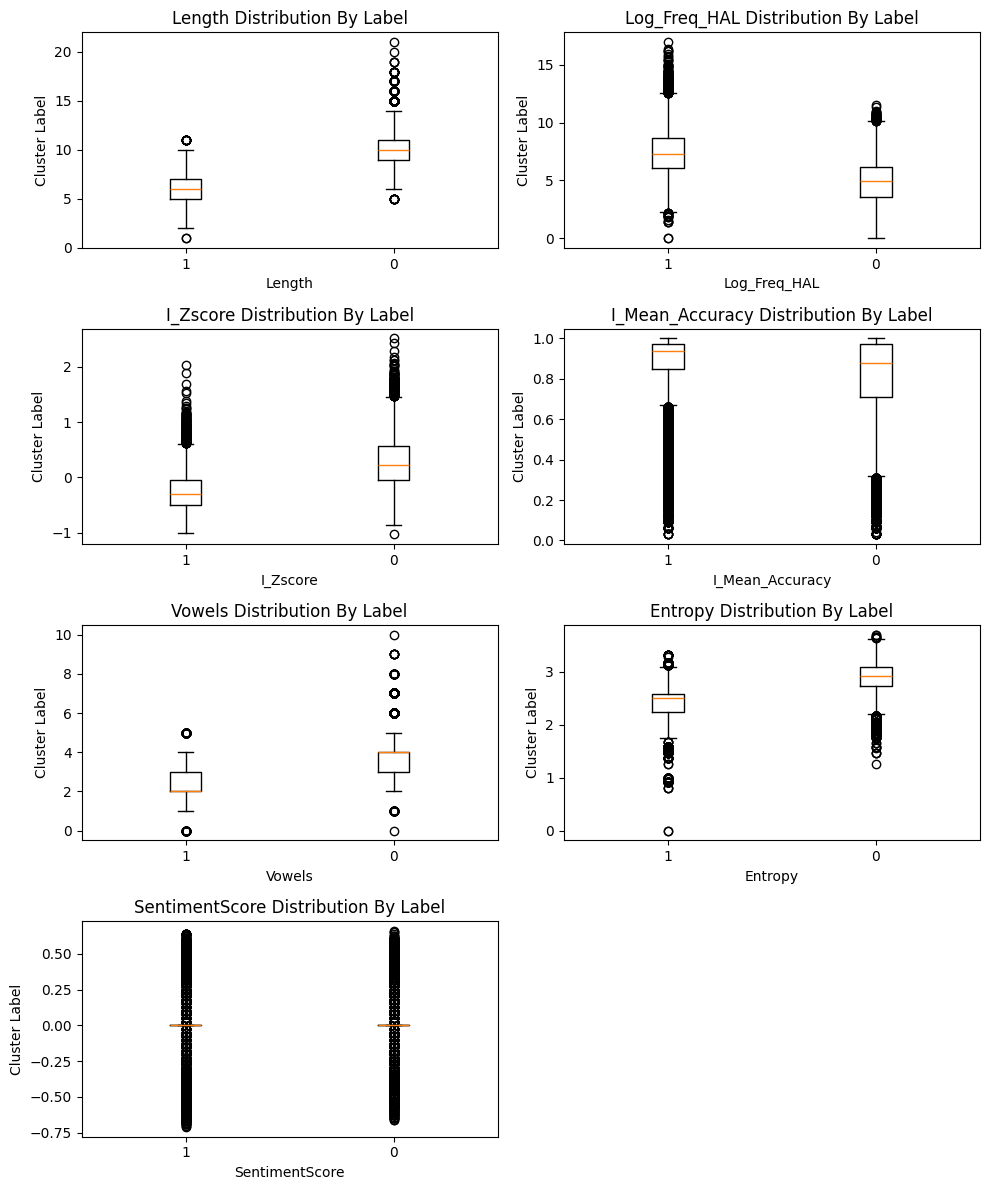

In [70]:
fig, axes = plt.subplots(4, 2, figsize=(10, 12))
axes = axes.flatten()

# Loop through each feature and create multi-boxplots
for idx, column in enumerate(kmeans_df.drop(columns='Labels').columns):
    label_dict = {}
    
    for label in kmeans_df['Labels'].unique():
        # Filter the DataFrame for rows with the current label
        filtered_data = kmeans_df[kmeans_df['Labels'] == label][column].tolist()

        # Assign the filtered data to the dictionary with the label as the key
        label_dict[label] = filtered_data
        

    axes[idx].boxplot(label_dict.values())
    axes[idx].set_xticklabels(label_dict.keys())
    axes[idx].set_title(f'{column} Distribution By Label')
    axes[idx].set_xlabel(f'{column}')
    axes[idx].set_ylabel('Cluster Label')
    
axes[7].remove()
plt.tight_layout()
plt.show()

Based on the multi-boxplots for each feature, we observe no large marginal seperation for each label within a cluster using K-Means. This would suggest that the corpus dataset is inherently dense and requires a "soft" solution. 

## Part IV: Gaussian Mixture Model

Our next clustering algorithm will be a Gaussian Mixture Model. We will transfer over our best `n_clusters=2` parameter from K-Means. Based on previous 2D plot, we can approximate a tied covariance matrix to fit our Gaussian Mixture Model.

In [71]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, covariance_type='tied')
gmm_labels = gmm.fit_predict(df)

In [72]:
print(f'Silhouette Score: {silhouette_score(df, labels)}')

Silhouette Score: 0.22549648578283554


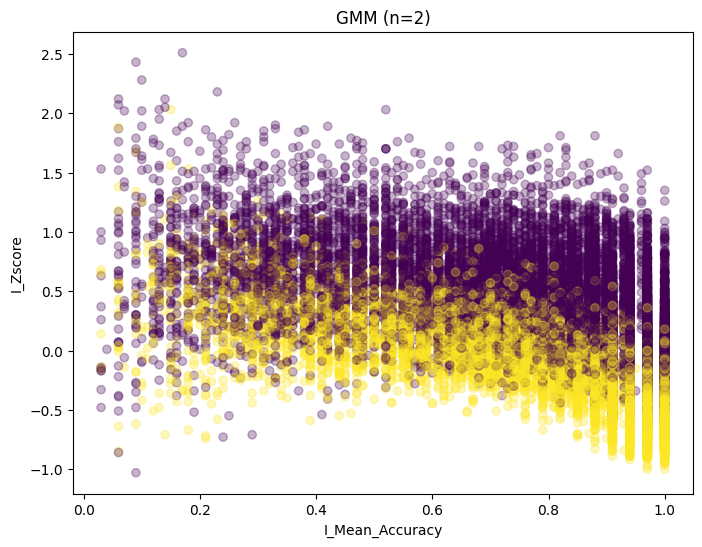

In [73]:
plt.figure(figsize=(8, 6))

plt.scatter(df['I_Mean_Accuracy'], df['I_Zscore'], cmap='viridis', c=gmm_labels, alpha=0.3)
plt.title('GMM (n=2)')
plt.xlabel('I_Mean_Accuracy')
plt.ylabel('I_Zscore')

plt.show()

In [74]:
gmm_df = df
gmm_df['Labels'] = gmm_labels
gmm_grouped = gmm_df.groupby('Labels').agg(['mean', std])

gmm_grouped

Length           Log_Freq_HAL            I_Zscore            \
            mean       std         mean       std      mean       std   
Labels                                                                  
0       9.884965  1.876173     4.766688  2.065915  0.285711  0.429781   
1       6.298746  1.499390     7.443729  1.919147 -0.248538  0.325460   

       I_Mean_Accuracy              Vowels             Entropy            \
                  mean       std      mean       std      mean       std   
Labels                                                                     
0             0.803654  0.215263  3.818393  1.100467  2.859012  0.282806   
1             0.874975  0.176929  2.259930  0.832827  2.384091  0.371323   

       SentimentScore            
                 mean       std  
Labels                           
0           -0.003503  0.112190  
1           -0.005334  0.131089

The Gaussian Mixture Model did not seem to seperate any better. Interestingly, the clustering is very similar to K-Means as the mean and standard deviation within each cluster for each cluster are approximately equal.

## Part V: Model Selection

This section will be dedicated to comparing other clustering algorithms. We wont dive into the implementation, as they take long to train. Our rough implementations can mostly be found the `/scratch` directory. The following clustering algorithms we experimented with:

- Spectral Clustering
- Hierarchial Clustering

At this point, it is expected that the majority of unsuperivsed clustering algorithms will perform poorly against the dense corpus dataset. However, if the majority of clustering algorithms are performing consistently poor, it could suggest an underlying pattern that generally all words are dense in a vector space.

Again we will cluster for `n_clusters=2`, as it yielded the best results from the K-Means and Gaussian Mixture Model.

In [75]:
# Spectral clustering, used to 10 nearest neighbors to construct affinity matrix
# We will import the projected eigenvectors obtained from the affinity matrix computed prior

proj_df = pd.read_csv('./outputs/proj_df.csv')
spectral_labels = KMeans(n_clusters=2).fit_predict(proj_df)
print(f'Silhouette Score: {silhouette_score(df, spectral_labels)}')

C:\Users\erics\anaconda3\envs\COGS118B_WI24\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 

In [ ]:
# Heirarchial clustering, using complete linkage tree distance
import pickle
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

with open('./outputs/tree_cplt.p', 'rb') as model:
    tree_cplt = pickle.load(model)
    
# Cut to make 2 clusters
heirarchial_labels = fcluster(tree_cplt, criterion='distance', t=25)
print(f'Silhouette Score: {silhouette_score(df, heirarchial_labels)}')

![heirarchial_clustering](./outputs/heirarchial_clusterings.png)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

axes[0].scatter(df['I_Mean_Accuracy'], df['I_Zscore'], cmap='viridis', c=spectral_labels, alpha=0.3)
axes[0].set_title('Spectral Clustering (n=2)')
axes[0].set_xlabel('I_Mean_Accuracy')
axes[0].set_ylabel('I_Zscore')

axes[1].scatter(df['I_Mean_Accuracy'], df['I_Zscore'], cmap='viridis', c=heirarchial_labels, alpha=0.3)
axes[1].set_title('Complete Linkage Hierarchial Clustering (n=2)')
axes[1].set_xlabel('I_Mean_Accuracy')
axes[1].set_ylabel('I_Zscore')

plt.show()

In [ ]:
heirarchial_df = df
heirarchial_df['Labels'] = heirarchial_labels
heirarchial_grouped = heirarchial_df.groupby('Labels').agg(['mean', std])

heirarchial_grouped

Based on the silhouette scores, the complete linkage heirarchial clustering method is relatively the best clustering we can obtain for this data. However, after testing various clustering algorithms, it does fortify that this words are too dense. It could suggest that we are missing some external latent factor, not accounted for our clusterings.

Let us also compare the similarity between all clustering algorithms using Random Index Scores and Kullback-Leibler Divergence metrics.

In [ ]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from itertools import combinations

# Spectral labels are flipped...
spectral_labels = [0 if label else 1 for label in spectral_labels]

all_labels = {'K-Means': knn_labels_2_clusters, 
              'Gaussian Mixture Model': gmm_labels, 
              'Spectral Clustering': spectral_labels, 
              'Heirarchial Clustering': heirarchial_labels}

model_combinations = list(combinations(all_labels.keys(), 2))

for pairing in model_combinations:
    model1, model2 = pairing
    
    print(f'{model1} vs. {model2}')
    print(f'Adjusted Random Index Score: {adjusted_rand_score(all_labels[model1], all_labels[model2])}')
    print(f'Adjusted Kullback-Leibler Divergence: {adjusted_mutual_info_score(all_labels[model1], all_labels[model2])}')
    print('')

Although it appears that the clusterings for `n_clusters=2` for various models experimented peformed similar on silhouette scores, the Random Index and Kullback-Leibler Divergence scores says otherwise. They appear similar but it is likely the case that the inner dense most overlapping labels were inconsistent against other clustering models. However, interestingly, we did get the max scores in similarity for K-Means and Gaussian Mixture Model. This could suggest that words are convex in a vector space perhaps.

## Part VI: Word Embedding-Based Clustering

One barrier for obtianing better clusterings is the dataset density. A potential solution could be utilizing a word's embedding to cluster instead. For this section, we will be using a pre-trained `word2vec` model from a Google News corpus (3 billion running words). Each word will be converted into a 300-dimension vector.

In [ ]:
# The word2vec-google-news-300 model is ~10GB
import gensim.downloader as api
from gensim.models import KeyedVectors

DOWNLOAD = False
path = '/Users/kendrick/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz'

if DOWNLOAD:
    path = api.load('word2vec-google-news-300', return_path=True)

In [ ]:
# Prepare model and get valid words supported by model
word2vec_model = KeyedVectors.load_word2vec_format(path, binary=True)

words = [[i] for i in df.index]
filtered_words = [word for word in words if word[0] in word2vec_model]

In [ ]:
# Vectorize
word_vectors = {}
for word in filtered_words:
    vector = word2vec_model[word]
    word_vectors.update({word[0]: vector})

In [ ]:
# Add another dimension for I_ZScore. Also normalize vectors prior to clustering
for word in word_vectors:
    difficulty = df.loc[word]['I_Zscore']
    difficulty = np.array([[difficulty]])
    
    new_vector = np.hstack((word_vectors[word], difficulty))
    word_vectors[word] = new_vector

# Normalize
normalized_vectors = np.array(list(word_vectors.values()))[:,0,:]
normalized_vectors = (normalized_vectors - normalized_vectors.mean(axis=0)) / normalized_vectors.std(axis=0)

In [ ]:
# Visualize first 2-dimensions
plt.figure(figsize=(8, 6))

plt.scatter(normalized_vectors[:, 0], normalized_vectors[:, 1], marker='.', s=1)
plt.title('Visualize First 2-Dimensions')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

Above is a visualization for the first 2-dimensions of the word embedding vector. There continues a pattern where the word vector space is dense.

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2)
embedded_labels = kmeans.fit_predict(normalized_vectors)

print(f'Silhouette Score: {silhouette_score(normalized_vectors, embedded_labels)}')

In [ ]:
# Visualize vectorized KMeans
plt.figure(figsize=(8, 6))

plt.scatter(normalized_vectors[:, 0], normalized_vectors[:, 1], cmap='viridis', c=embedded_labels, alpha=0.3)
plt.title('Visualize First 2-Dimensions KMeans Clustering')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

Using K-Means to cluster word vectors did not provide any better results unfortunately. In fact, the SUBTLEXUS corpus dataset seem to at least provide a somewhat of a seperable distinction between 2 clusters. 

The last thing to test with word embeddings is to see if clustering is a trivial problem, which can be solved by applying a hard threshold for difficulty. We can say that anything above the median of `I_ZScore`s will be regarded as hard (`1`) and anything below is easy (`0`).

In [ ]:
# Apply a threshold difficulty label for each I_ZScore (say at the median)
threshold = df['I_Zscore'].median()

threshold_labels = (df.loc[df.index.isin(word_vectors.keys())]['I_Zscore'] > threshold)
threshold_labels = list(threshold_labels.astype(int))

In [ ]:
print(f'Silhouette Score: {silhouette_score(normalized_vectors, threshold_labels)}')

In [ ]:
# Visualize thresholding
plt.figure(figsize=(8, 6))

plt.scatter(normalized_vectors[:, 0], normalized_vectors[:, 1], cmap='viridis', c=threshold_labels, alpha=0.3)
plt.title('Visualize First 2-Dimensions Threshold Clustering')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

Seem to perform worse. In fact, scores averaging near 0 this further suggests a dense (and overlapping) distribution.

# Discussion

### Interpreting the result

* Main Point: We found that word datasets are inherently dense; therefore, there is no absolute algorithm to clustering words in relation to difficulty or `I_Zscore`. Although the silhouette score metrics for the various clustering algorithms we experimented were low, we did observe that it consistently performed the same with `n_components=2` being the optimal parameter. This could suggest a pattern that word representations in space are not sensitive to clustering models (due to being dense and far from sparse).

* For particularly this dataset, the `I_Mean_Accuracy` feature is another critical feature in addition to our target feature or `I_Zscore` word difficulty. By regressing the features in a One Vs. One manner by dropping one feature at a time, we found that removing that the `I_Mean_Accuracy` has significant influence in $R^2$ proportion of variance. An underlying pattern for word difficulty is that it is correlated to `I_Mean_Accuracy`.

* Corpus-based datasets are inherently dense as there appears to be many overlapping points and points concentrated in the center. Particular for the SUBTLEXUS corpus, the distribution appeared circular, yet there was no apparent clusters when visualizng the first two dimensions or components. This point is additional proven when utilizing the words' respective vector embedding where the distribution is still dense.

* Another potential factor that is undermining the quality of our clustering is our limited dataset features and observations. Our dataset size contains about ~4,0000 words, yet this is a mere fraction of the existing English words ~600,000 words.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

The dataset that we are using is a public English word dataset that have various features and characteristics that may contribute to the word difficulty. Some of these characteristics were obtained from other research works, and we will take precaution in properly providing credit when given. Otherwise, there should not be any privacy and ethical concern in our project

The project can be biased since the methods and reasonings we will employ for suggesting underlying patterns and difficulty is strictly for English words. Thus, our result will not necessarily translate and generalize for other languages unfortunately

Another facet that we need to consider is how our results may be used or interpreted. Our models and our results should in no way be used as a metric to judge individuals. Language learning is not a uniform process between different people and our model should not be used as a way to gauge someone's progress in learning a language.

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="avisheknote"></a>1.[^](#avishek): Avishek, G et al. (2019) Word Difficulty Prediction Using Covolutional Neural Networks. https://github.com/garain/Word-Difficulty-Prediction/blob/master/WORD_DIFFICULTY.pdf<br>
<a name="wikinote"></a>2.[^](#wiki): Wikipedia contributors (18 Feb. 2024) List of Languages By Total Number of Speakers. https://en.wikipedia.org/wiki/List_of_languages_by_total_number_of_speakers<br>
<a name="fleschnote"></a>3.[^](#flesch): Wikipedia contributors (27 Dec. 2023) Flesch–Kincaid readability tests. https://en.wikipedia.org/w/index.php?title=Flesch%E2%80%93Kincaid_readability_tests&oldid=1192056958<br>
<a name="sklearnnote"></a>4.[^](#sklearn): sklearn.metrics.silhouette_score. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html<br>
<a name="fleischernote"></a>5.[^](#fleischer): Lecture 6: K-Means etc. https://github.com/COGS118B/Lecture/blob/main/L06_Kmeans.pdf<br>
<a name="adjectivenote"></a>6.[^](#adjective): Order of adjectives. https://dictionary.cambridge.org/us/grammar/british-grammar/adjectives-order<br>
<a name="lexiconnote"></a>7.[^](#lexicon): Balota, D. A., Yap, M. J., Cortese, M. J., Hutchison, K. A., Kessler, B., Loftis, B., Neely, J. H., Nelson, D. L., Simpson, G. B., & Treiman, R. (2007) The English Lexicon Project. https://link.springer.com/content/pdf/10.3758/BF03193014.pdf<br>
<a name="lexicalnote"></a>8.[^](#lexical): Daniel, Z., Stephanie, M. (2000) Lexical Decision. https://www.sciencedirect.com/topics/social-sciences/lexical-decision#:~:text=One%20measure%20of%20the%20relative,the%20English%20language%20or%20not.<br>